In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_mean
import scipy.stats
import dabest

import sys
sys.path.append('../')
from src.functions import get_parameters

# parameters

In [26]:
parameter_local_path = '../conf/local/parameters.yml'

parameters = get_parameters(parameter_local_path)

base_folder = parameters["data_dir"]
out_folder = parameters["out_dir"]



Parameters: 
{'key_file': '/media/fjodor/Elephant/Dropbox/MDC_Projects/Manuscript_HHT/migration_assay/in_vivo/mosaic_EC/2024-06-30_keyfile.xls', 'data_dir': '/media/fjodor/Elephant/Dropbox/MDC_Projects/Manuscript_HHT/', 'out_dir': '/media/fjodor/Elephant/Dropbox/MDC_Projects/Manuscript_HHT/migration_assay/in_vivo/output/', 'experiment_IDs_exclude': [], 'pixel_no_per_retina': 10000, 'image_types': ['GFP'], 'load_conditions': ['CDH5CreERT2;iSureCre;YesFloxFlox', 'CDH5CreERT2 iSureCre'], 'plot_kde': False, 'plot_individual_hist': False, 'plot_cond_kde': True, 'radial_bins': [[0, 1200]], 'time_points': ['P3_P7', 'P3_P15'], 'number_ks_test': 1}


In [27]:
px_per_cell = 300.0


condition_palette = {"ctrl" : "#1f77b4",
                       "Smad4 KO" : "#ff7f0e",
                        "Alk1 KO" : "#2ca02c"}

time_condition_palette={ 'ctrl P8' : "#1f77b4",  'ctrl P15': "#1f77b4", 
                         'Smad4 KO P8' : "#ff7f0e",   'Smad4 KO P15' : "#ff7f0e", 
                         'Alk1 KO P8' : "#2ca02c",   'Alk1 KO P15': "#2ca02c"}

time_series_palette1 = { 'ctrl P8 (P5)' : '#ccbb44',
                         'Smad4 KO P8 (P5)' : '#ccbb44', 
                         'Alk1 KO P8 (P5)' : '#ccbb44',
                         'ctrl P15 (P5)' : '#4477aa',
                         'Smad4 KO P15 (P5)' : '#4477aa', 
                         'Alk1 KO P15 (P5)' : '#4477aa'}
                         # 'Ctr P8 (P5)' : '#228833',
                         #'Cdc42 KO P8 (P5)' : '#228833', 
                         #'Rac1 KO P8 (P5)' : '#228833',
                         #'Ctr P9 (P5)' : '#ee6677',
                         #'Cdc42 KO P9 (P5)' : '#ee6677', 
                         #'Rac1 KO P9 (P5)' : '#ee6677',
                         #'Ctr P9 (P8)' : '#bbbbbb',
                         #'Cdc42 KO P9 (P8)' : '#bbbbbb', 
                         #'Rac1 KO P9 (P8)' : '#bbbbbb'}

time_series_palette2 = { 'P8 (inj. P5)' : '#ccbb44',  
                      'P15 (inj. P5)' : '#4477aa'} 
                    #  'P8 (inj. P5)' : '#228833',   
                    # 'P9 (inj. P5)' : '#ee6677',
                    # 'P9 (inj. P8)' : '#bbbbbb'}

swarm_ylim=(0, 15)
contrast_ylim=(-4, 2)

#effect_size = "cohens_d"
#effect_size = "hedges_g"
effect_size = "mean_diff"

# load data

In [28]:
summary_data = pd.read_csv(out_folder + "summary_data.csv")
dtype_change = {'ExperimentID': int, 'collection_time': int}
summary_data = summary_data.astype(dtype_change)
summary_data

,ExperimentID,condition,collection_time,GFP_px,GFP_artery_px,GFP_vein_px,artery_px,vein_px,GFP_arterial_bed_px,GFP_venous_bed_px
0,1,ALK1-KO,8,123132.0,6186.0,4959.0,103008.0,84652.0,79215.0,32759.0
1,2,ALK1-KO,8,209482.0,4690.0,7767.0,112431.0,78389.0,126816.0,70193.0
2,3,ALK1-KO,8,77447.0,6246.0,3268.0,101794.0,67113.0,46822.0,21107.0
3,4,ALK1-KO,8,67130.0,4506.0,2256.0,93226.0,78413.0,36002.0,24362.0
4,5,ALK1-KO,15,123027.0,7731.0,4614.0,125180.0,90042.0,69065.0,41794.0
5,6,ALK1-KO,15,97628.0,5570.0,4908.0,130070.0,91114.0,58689.0,28645.0
6,7,SMAD4-KO,8,19235.0,349.0,1488.0,111689.0,67096.0,7059.0,10336.0
7,8,SMAD4-KO,8,39907.0,1745.0,1267.0,117697.0,59340.0,23457.0,13464.0
8,9,SMAD4-KO,8,61518.0,1509.0,2331.0,118154.0,77730.0,36204.0,21462.0
9,10,SMAD4-KO,8,43387.0,1890.0,2972.0,113017.0,73877.0,24747.0,13770.0


In [29]:
summary_data["percentage_artery"] = 100.0*summary_data["GFP_artery_px"]/summary_data["GFP_px"]
summary_data["percentage_vein"] = 100.0*summary_data["GFP_vein_px"]/summary_data["GFP_px"]
summary_data["percentage_arterial_bed"] = 100.0*summary_data["GFP_arterial_bed_px"]/summary_data["GFP_px"]
summary_data["percentage_venous_bed"] = 100.0*summary_data["GFP_venous_bed_px"]/summary_data["GFP_px"]
#summary_data["percentage_GFP"] = 100.0*summary_data["GFP_px"]/summary_data["IB4_px"] #may not be very important


summary_data["labelled_ECs"] = summary_data["GFP_px"]/px_per_cell
summary_data["labelled_arterial_ECs"] = summary_data["GFP_artery_px"]/px_per_cell
summary_data["labelled_venous_ECs"] = summary_data["GFP_vein_px"]/px_per_cell

summary_data_P5_P8 = summary_data[summary_data["collection_time"]==8]
summary_data_P5_P8["inj_time"] = 'P8 (inj. P5)'
summary_data_P5_P15 = summary_data[summary_data["collection_time"]==15]
summary_data_P5_P15["inj_time"] = 'P15 (inj. P5)'
summary_data_ts = summary_data_P5_P8.copy()
summary_data_ts = summary_data_ts.append(summary_data_P5_P15, ignore_index = True)


summary_data_CTR = summary_data[summary_data["condition"]== "control"]
summary_data_CTR["cond."] = "ctrl"
summary_data_SMAD4 = summary_data[summary_data["condition"]== "SMAD4-KO"]
summary_data_SMAD4["cond."] = "Smad4 KO"
summary_data_Alk1 = summary_data[summary_data["condition"]== "ALK1-KO"]
summary_data_Alk1["cond."] = "Alk1 KO"

summary_data = summary_data_CTR.append(summary_data_SMAD4, ignore_index = True)
summary_data = summary_data.append(summary_data_Alk1, ignore_index = True)


/tmp/ipykernel_65973/4226010652.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_P5_P8["inj_time"] = 'P8 (inj. P5)'
/tmp/ipykernel_65973/4226010652.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_P5_P15["inj_time"] = 'P15 (inj. P5)'
/tmp/ipykernel_65973/4226010652.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_data_ts = summary_data_ts.append(summary_data_P5_P15, ignore_i

# get mean values and SEM for reporting

In [30]:
summary_data.groupby(by=["condition","collection_time"]).mean()
summary_data_mean=summary_data.groupby(by=["condition","collection_time"]).mean().add_suffix('').reset_index()
display(summary_data_mean)
summary_data_mean.to_csv(out_folder + 'summary_data_mean.csv')

#summary_data.groupby(by=["time_interval"]).mean()

/tmp/ipykernel_65973/524152429.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_data.groupby(by=["condition","collection_time"]).mean()
/tmp/ipykernel_65973/524152429.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_data_mean=summary_data.groupby(by=["condition","collection_time"]).mean().add_suffix('').reset_index()


,condition,collection_time,ExperimentID,GFP_px,GFP_artery_px,GFP_vein_px,artery_px,vein_px,GFP_arterial_bed_px,GFP_venous_bed_px,percentage_artery,percentage_vein,percentage_arterial_bed,percentage_venous_bed,labelled_ECs,labelled_arterial_ECs,labelled_venous_ECs
0,ALK1-KO,8,10.8,101075.000000,4456.200000,3981.200000,104777.600000,80414.200000,61205.400000,31423.400000,4.871374,4.238216,59.977316,30.902263,336.916667,14.854000,13.270667
1,ALK1-KO,15,5.5,110327.500000,6650.500000,4761.000000,127625.000000,90578.000000,63877.000000,35219.500000,5.994658,4.388821,58.126505,31.656186,367.758333,22.168333,15.870000
2,SMAD4-KO,8,10.0,53819.714286,2158.000000,2534.714286,120229.571429,78689.142857,29458.857143,19684.000000,3.868240,5.061329,53.391779,37.703671,179.399048,7.193333,8.449048
3,SMAD4-KO,15,20.5,80222.285714,8346.714286,5149.714286,170672.214286,112915.000000,48423.428571,18415.857143,10.692197,6.489789,60.255477,22.696537,267.407619,27.822381,17.165714
4,control,8,31.5,54580.500000,3694.375000,3317.000000,84753.875000,55919.375000,28732.375000,19103.500000,7.831504,5.875643,53.977294,32.902819,181.935000,12.314583,11.056667
5,control,15,39.5,45208.750000,3882.000000,2639.750000,134479.875000,96895.000000,26921.625000,11850.500000,8.515211,6.022816,59.605446,26.037526,150.695833,12.940000,8.799167


In [31]:
summary_data.groupby(by=["condition","collection_time"]).sem()
summary_data_sem=summary_data.groupby(by=["condition","collection_time"]).sem().add_suffix('').reset_index()
display(summary_data_sem)
summary_data_sem.to_csv(out_folder + 'summary_data_sem.csv')

#summary_data.groupby(by=["time_interval"]).sem()

/tmp/ipykernel_65973/3527362248.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_data.groupby(by=["condition","collection_time"]).sem()
/tmp/ipykernel_65973/3527362248.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_data_sem=summary_data.groupby(by=["condition","collection_time"]).sem().add_suffix('').reset_index()


,condition,collection_time,ExperimentID,GFP_px,GFP_artery_px,GFP_vein_px,artery_px,vein_px,GFP_arterial_bed_px,GFP_venous_bed_px,percentage_artery,percentage_vein,percentage_arterial_bed,percentage_venous_bed,labelled_ECs,labelled_arterial_ECs,labelled_venous_ECs
0,ALK1-KO,8,8.315047,31034.039528,1017.768756,1099.543060,3734.260765,4326.256874,19248.545928,10434.778151,1.163320,0.434605,1.742251,1.838609,103.446798,3.392563,3.665144
1,ALK1-KO,15,0.500000,12699.500000,1080.500000,147.000000,2445.000000,536.000000,5188.000000,6574.500000,0.289328,0.638425,1.988421,2.315218,42.331667,3.601667,0.490000
2,SMAD4-KO,8,0.816497,7785.316355,518.495396,361.946636,3545.062085,6155.165320,4493.190983,3052.133266,0.717323,0.694595,2.949918,3.056599,25.951055,1.728318,1.206489
3,SMAD4-KO,15,1.118034,10651.075787,1212.159350,716.670165,3897.682195,2807.457733,6534.980963,2732.654001,0.739949,0.497908,1.171335,1.210352,35.503586,4.040531,2.388901
4,control,8,0.866025,18461.615215,925.867449,1141.173988,13579.017651,10117.923163,9782.353102,7030.574141,1.097789,0.895658,1.880178,1.759166,61.538717,3.086225,3.803913
5,control,15,0.866025,5517.383473,676.683509,310.158240,4195.319324,4123.553556,3513.452570,1824.857538,0.902428,0.425824,2.251628,2.278651,18.391278,2.255612,1.033861


/tmp/ipykernel_65973/1655898199.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/1655898199.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/1655898199.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/1655898199.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/1655898199.py:25: FutureWarning: The frame.append method is dep

['ctrl P8' 'ctrl P15' 'Smad4 KO P8' 'Smad4 KO P15' 'Alk1 KO P8'
 'Alk1 KO P15']
DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:27:19 2024.

The unpaired mean difference between ctrl P8 and ctrl P15 is 0.684 [95%CI -1.94, 3.25].
The p-value of the two-sided permutation t-test is 0.628, calculated for legacy purposes only. 

The unpaired mean difference between Smad4 KO P8 and Smad4 KO P15 is 6.82 [95%CI 4.81, 8.56].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between Alk1 KO P8 and Alk1 KO P15 is 1.12 [95%CI -0.921, 3.17].
The p-value of the two-sided permutation t-test is 0.633, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P8,ctrl P15,8,8,mean difference,None,0.683707,95,-1.943945,3.249571,...,"[-2.796501773799383, -0.9936114624632175, 0.38...",0.6284,5000,"[1.4943044265420573, 1.9823871717224002, 2.042...",0.638144,-0.481112,0.637869,-0.481112,0.720901,28.0
1,Smad4 KO P8,Smad4 KO P15,7,14,mean difference,None,6.823958,95,4.808655,8.563915,...,"[-0.45980207646934623, -3.875391321940474, -0....",0.0000,5000,"[4.440736857915634, 2.562566632752305, 3.80589...",0.000005,-6.621531,0.000013,-5.835210,0.000034,1.0
2,Alk1 KO P8,Alk1 KO P15,5,2,mean difference,None,1.123285,95,-0.921005,3.167574,...,"[1.1232845595932819, 0.6462670235885728, -1.24...",0.6334,5000,"[1.437023934813019, 1.7792498393454086, 4.8814...",0.396832,-0.937039,0.590026,-0.575271,0.857143,4.0


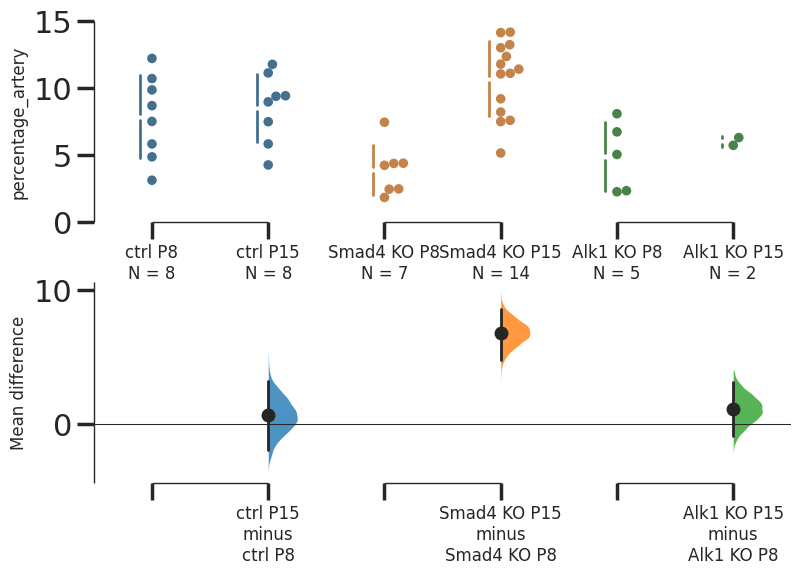

In [32]:
control_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='control']['percentage_artery'])
control_p15 = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='control']['percentage_artery'])
SMAD4_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='SMAD4-KO']['percentage_artery'])
SMAD4_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='SMAD4-KO']['percentage_artery'])
Alk1_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='ALK1-KO']['percentage_artery'])
Alk1_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='ALK1-KO']['percentage_artery'])


plot_df = pd.DataFrame(data = {'percentage_artery':control_p8})
plot_df['condition'] = 'ctrl P8'
temp_df = pd.DataFrame(data = {'percentage_artery':control_p15})
temp_df['condition'] = 'ctrl P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':SMAD4_p8})
temp_df['condition'] = 'Smad4 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':SMAD4_p15})
temp_df['condition'] = 'Smad4 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':Alk1_p8})
temp_df['condition'] = 'Alk1 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_artery':Alk1_p15})
temp_df['condition'] = 'Alk1 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)

print(plot_df["condition"].unique())
#plot_df

properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_artery",
                          idx=(( 'ctrl P8', 'ctrl P15'), 
                               ( 'Smad4 KO P8',  'Smad4 KO P15'), 
                               ( 'Alk1 KO P8',  'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test.savefig(out_folder + "percentage_artery_P8_P15.pdf")
test.savefig(out_folder + "percentage_artery_P8_P15.png")

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:27:28 2024.

The unpaired mean difference between ctrl P15 and Smad4 KO P15 is 2.18 [95%CI 0.133, 4.5].
The p-value of the two-sided permutation t-test is 0.0834, calculated for legacy purposes only. 

The unpaired mean difference between ctrl P15 and Alk1 KO P15 is -2.52 [95%CI -4.39, -0.976].
The p-value of the two-sided permutation t-test is 0.282, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P15,Smad4 KO P15,8,14,mean difference,None,2.176986,95,0.132578,4.501202,...,"[0.07432981402147476, -1.074925902330671, 1.52...",0.0834,5000,"[1.979454157615343, 1.7027722720856797, 1.8454...",0.080864,-1.865447,0.083343,-1.822651,0.095018,31.0
1,ctrl P15,Alk1 KO P15,8,2,mean difference,None,-2.520552,95,-4.386735,-0.976285,...,"[3.185974055818379, -0.4168900844289638, 4.277...",0.2818,5000,"[2.0802596937640283, 12.377276719495999, 0.574...",0.029051,2.659725,0.219273,1.332903,0.266667,13.0


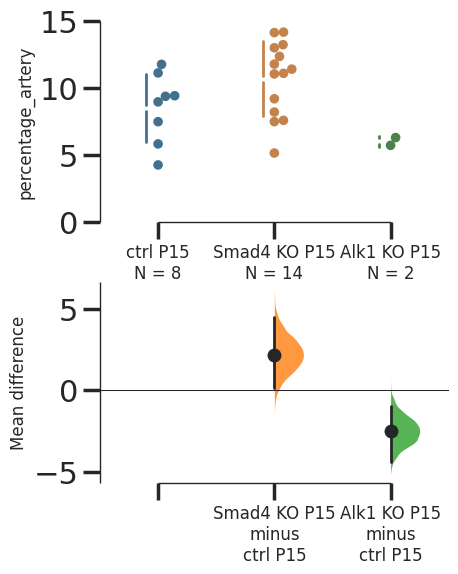

In [33]:
properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_artery",
                          idx=(( 'ctrl P15',  'Smad4 KO P15',  'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test.savefig(out_folder + "percentage_artery_P15.pdf")
test.savefig(out_folder + "percentage_artery_P15.png")

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:27:34 2024.

The unpaired mean difference between ctrl P8 and Smad4 KO P8 is -3.96 [95%CI -6.3, -1.49].
The p-value of the two-sided permutation t-test is 0.0118, calculated for legacy purposes only. 

The unpaired mean difference between ctrl P8 and Alk1 KO P8 is -2.96 [95%CI -5.83, -0.134].
The p-value of the two-sided permutation t-test is 0.106, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P8,Smad4 KO P8,8,7,mean difference,None,-3.963264,95,-6.303788,-1.493362,...,"[-2.4650921045502923, -1.2076021528610434, 1.5...",0.0118,5000,"[2.4674901755129692, 2.7043118635080106, 3.056...",0.010844,3.022231,0.011825,2.925072,0.009324,50.0
1,ctrl P8,Alk1 KO P8,8,5,mean difference,None,-2.960130,95,-5.834111,-0.134377,...,"[-3.1154050915541234, -0.6403872983338372, 1.4...",0.1060,5000,"[2.423071096198762, 2.971222954213399, 3.79019...",0.094436,1.850640,0.104224,1.771027,0.127428,31.0


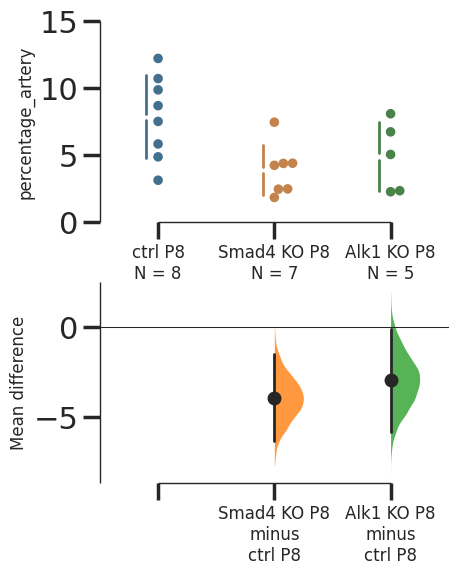

In [34]:
properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_artery",
                          idx=(( 'ctrl P8',  'Smad4 KO P8',  'Alk1 KO P8')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test.savefig(out_folder + "percentage_artery_P8.pdf")
test.savefig(out_folder + "percentage_artery_P8.png")

/tmp/ipykernel_65973/927695152.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/927695152.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/927695152.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/927695152.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/927695152.py:25: FutureWarning: The frame.append method is deprecat

['ctrl P8' 'ctrl P15' 'Smad4 KO P8' 'Smad4 KO P15' 'Alk1 KO P8'
 'Alk1 KO P15']
DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:27:45 2024.

The unpaired mean difference between ctrl P8 and ctrl P15 is 5.63 [95%CI 0.541, 11.3].
The p-value of the two-sided permutation t-test is 0.0764, calculated for legacy purposes only. 

The unpaired mean difference between Smad4 KO P8 and Smad4 KO P15 is 6.86 [95%CI 2.7, 15.8].
The p-value of the two-sided permutation t-test is 0.0106, calculated for legacy purposes only. 

The unpaired mean difference between Alk1 KO P8 and Alk1 KO P15 is -1.85 [95%CI -5.32, 2.96].
The p-value of the two-sided permutation t-test is 0.449, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 500

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P8,ctrl P15,8,8,mean difference,None,5.628152,95,0.540969,11.300907,...,"[1.333290332703065, 4.901927985913666, -4.3231...",0.0764,5000,"[10.740499629258753, 9.151125710129884, 9.5324...",0.076316,-1.918638,0.075653,-1.918638,0.194872,19.0
1,Smad4 KO P8,Smad4 KO P15,7,14,mean difference,None,6.863698,95,2.697194,15.815436,...,"[2.96820262557263, -2.7408517162781365, 1.7369...",0.0106,5000,"[14.710370804094314, 7.256693312623044, 14.807...",0.062757,-2.162501,0.017371,-2.605749,0.020003,18.0
2,Alk1 KO P8,Alk1 KO P15,5,2,mean difference,None,-1.850811,95,-5.315030,2.962505,...,"[-1.8508114061039507, 1.102119174812671, -1.28...",0.4488,5000,"[6.989258617900024, 18.70045479309559, 8.72083...",0.538935,0.700078,0.576418,0.597151,0.380952,8.0


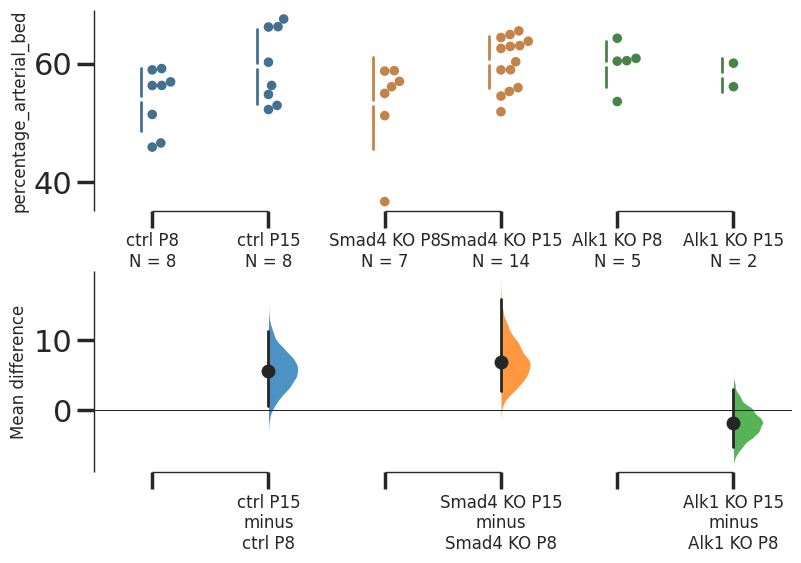

In [35]:
control_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='control']['percentage_arterial_bed'])
control_p15 = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='control']['percentage_arterial_bed'])
SMAD4_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='SMAD4-KO']['percentage_arterial_bed'])
SMAD4_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='SMAD4-KO']['percentage_arterial_bed'])
Alk1_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='ALK1-KO']['percentage_arterial_bed'])
Alk1_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='ALK1-KO']['percentage_arterial_bed'])


plot_df = pd.DataFrame(data = {'percentage_arterial_bed':control_p8})
plot_df['condition'] = 'ctrl P8'
temp_df = pd.DataFrame(data = {'percentage_arterial_bed':control_p15})
temp_df['condition'] = 'ctrl P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_arterial_bed':SMAD4_p8})
temp_df['condition'] = 'Smad4 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_arterial_bed':SMAD4_p15})
temp_df['condition'] = 'Smad4 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_arterial_bed':Alk1_p8})
temp_df['condition'] = 'Alk1 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_arterial_bed':Alk1_p15})
temp_df['condition'] = 'Alk1 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)

print(plot_df["condition"].unique())
#plot_df

properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_arterial_bed",
                          idx=(( 'ctrl P8', 'ctrl P15'), 
                               ( 'Smad4 KO P8',  'Smad4 KO P15'), 
                               ( 'Alk1 KO P8',  'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
#test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test = properties_dabest.mean_diff.plot(custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test.savefig(out_folder + "percentage_arterial_bed_P8_P15.pdf")
test.savefig(out_folder + "percentage_arterial_bed_P8_P15.png")

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:27:54 2024.

The unpaired mean difference between ctrl P15 and Smad4 KO P15 is 0.65 [95%CI -4.01, 5.14].
The p-value of the two-sided permutation t-test is 0.77, calculated for legacy purposes only. 

The unpaired mean difference between ctrl P15 and Alk1 KO P15 is -1.48 [95%CI -6.81, 3.37].
The p-value of the two-sided permutation t-test is 0.74, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P15,Smad4 KO P15,8,14,mean difference,None,0.650031,95,-4.009004,5.143801,...,"[3.5889714709185796, 0.5234400783496156, 2.606...",0.7698,5000,"[3.801311240702516, 5.850325475376507, 4.40196...",0.802646,-0.256111,0.779373,-0.283943,1.000000,56.0
1,ctrl P15,Alk1 KO P15,8,2,mean difference,None,-1.478941,95,-6.814261,3.368369,...,"[0.7795788986916818, 4.973998381341829, -0.029...",0.7396,5000,"[61.77229531974205, 13.275234522647107, 52.634...",0.647015,0.492334,0.764672,0.309742,0.888889,9.0


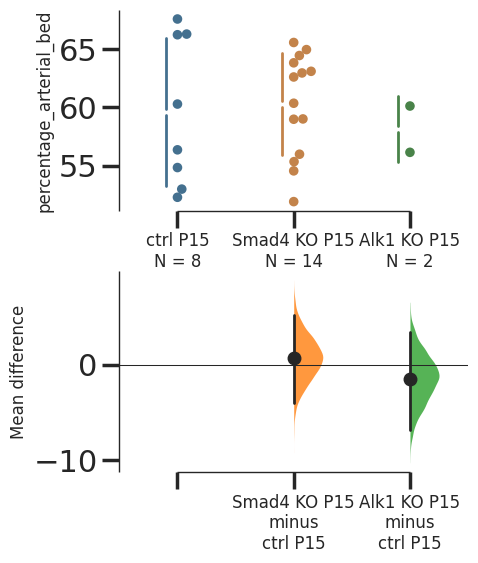

In [36]:

properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_arterial_bed",
                          idx=(( 'ctrl P15',  'Smad4 KO P15',  'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
#test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test = properties_dabest.mean_diff.plot(custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));

test.savefig(out_folder + "percentage_arterial_bed_P15.pdf")
test.savefig(out_folder + "percentage_arterial_bed_P15.png")

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:28:00 2024.

The unpaired mean difference between ctrl P8 and Smad4 KO P8 is -0.586 [95%CI -8.63, 4.54].
The p-value of the two-sided permutation t-test is 0.88, calculated for legacy purposes only. 

The unpaired mean difference between ctrl P8 and Alk1 KO P8 is 6.0 [95%CI 1.22, 10.3].
The p-value of the two-sided permutation t-test is 0.054, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P8,Smad4 KO P8,8,7,mean difference,None,-0.585515,95,-8.627715,4.543543,...,"[-2.403988702257145, 7.03038474918695, 0.27319...",0.880,5000,"[12.28283102576104, 6.875212862698357, 11.2870...",0.870284,0.167378,0.866207,0.171843,0.866511,30.0
1,ctrl P8,Alk1 KO P8,8,5,mean difference,None,6.000022,95,1.217080,10.291473,...,"[2.4547494390913016, 3.042046459178259, -2.686...",0.054,5000,"[12.523673929248334, 7.181327097307745, 10.760...",0.040023,-2.340741,0.052744,-2.170362,0.029526,5.0


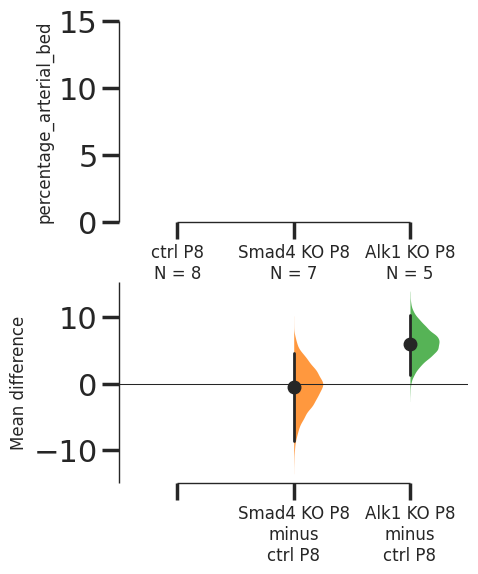

In [37]:
properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_arterial_bed",
                          idx=(( 'ctrl P8',  'Smad4 KO P8',  'Alk1 KO P8')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test.savefig(out_folder + "percentage_artery_P8.pdf")
test.savefig(out_folder + "percentage_artery_P8.png")

/tmp/ipykernel_65973/3707014959.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3707014959.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3707014959.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3707014959.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3707014959.py:25: FutureWarning: The frame.append method is dep

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:28:09 2024.

The unpaired mean difference between ctrl P8 and ctrl P15 is 0.147 [95%CI -1.61, 2.03].
The p-value of the two-sided permutation t-test is 0.882, calculated for legacy purposes only. 

The unpaired mean difference between Smad4 KO P8 and Smad4 KO P15 is 1.43 [95%CI -0.171, 2.95].
The p-value of the two-sided permutation t-test is 0.112, calculated for legacy purposes only. 

The unpaired mean difference between Alk1 KO P8 and Alk1 KO P15 is 0.151 [95%CI -1.05, 1.23].
The p-value of the two-sided permutation t-test is 0.855, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the result

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P8,ctrl P15,8,8,mean difference,None,0.147173,95,-1.606496,2.025252,...,"[0.170028254530874, -1.0596144395061327, 0.398...",0.8820,5000,"[0.9830116591597509, 0.9048778625118166, 0.973...",0.884973,-0.148401,0.884143,-0.148401,0.959130,31.0
1,Smad4 KO P8,Smad4 KO P15,7,14,mean difference,None,1.428460,95,-0.170954,2.945331,...,"[-0.6381271301043867, 0.27666729653489774, -1....",0.1124,5000,"[0.691964796956174, 0.8255608915566721, 0.6214...",0.119948,-1.671457,0.112626,-1.663467,0.148951,29.0
2,Alk1 KO P8,Alk1 KO P15,5,2,mean difference,None,0.150605,95,-1.054759,1.228103,...,"[0.15060527989928651, -0.5492974457918236, 0.7...",0.8548,5000,"[0.5964677778489438, 0.22697074417934715, 1.20...",0.863148,-0.195005,0.858404,-0.187818,0.857143,4.0


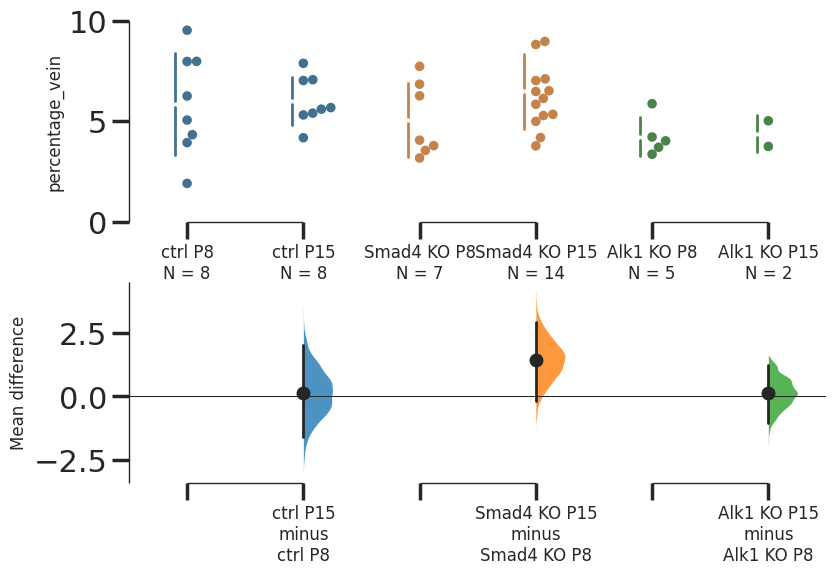

In [38]:
control_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='control']['percentage_vein'])
control_p15 = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='control']['percentage_vein'])
SMAD4_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='SMAD4-KO']['percentage_vein'])
SMAD4_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='SMAD4-KO']['percentage_vein'])
Alk1_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='ALK1-KO']['percentage_vein'])
Alk1_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='ALK1-KO']['percentage_vein'])


plot_df = pd.DataFrame(data = {'percentage_vein':control_p8})
plot_df['condition'] = 'ctrl P8'
temp_df = pd.DataFrame(data = {'percentage_vein':control_p15})
temp_df['condition'] = 'ctrl P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_vein':SMAD4_p8})
temp_df['condition'] = 'Smad4 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_vein':SMAD4_p15})
temp_df['condition'] = 'Smad4 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_vein':Alk1_p8})
temp_df['condition'] = 'Alk1 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_vein':Alk1_p15})
temp_df['condition'] = 'Alk1 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)

properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_vein",
                          idx=(( 'ctrl P8',  'ctrl P15'), 
                               ( 'Smad4 KO P8',   'Smad4 KO P15'), 
                               ( 'Alk1 KO P8',   'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));

test.savefig(out_folder + "percentage_vein_P8_P15.pdf")
test.savefig(out_folder + "percentage_vein_P8_P15.png")

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:28:16 2024.

The unpaired mean difference between ctrl P15 and Smad4 KO P15 is 0.467 [95%CI -0.695, 1.75].
The p-value of the two-sided permutation t-test is 0.537, calculated for legacy purposes only. 

The unpaired mean difference between ctrl P15 and Alk1 KO P15 is -1.63 [95%CI -2.74, -0.43].
The p-value of the two-sided permutation t-test is 0.0986, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P15,Smad4 KO P15,8,14,mean difference,None,0.466973,95,-0.695165,1.749339,...,"[-1.0229766246022773, 0.15347824135130672, -0....",0.5374,5000,"[0.6718229765813595, 0.5557575968569003, 0.524...",0.484417,-0.712759,0.533402,-0.633786,0.763949,51.0
1,ctrl P15,Alk1 KO P15,8,2,mean difference,None,-1.633995,95,-2.741789,-0.430231,...,"[0.6782541646605154, -1.0041655580628976, 0.80...",0.0986,5000,"[0.927365988066844, 0.7296039354087239, 0.7735...",0.165096,2.129243,0.115550,1.765076,0.088889,15.0


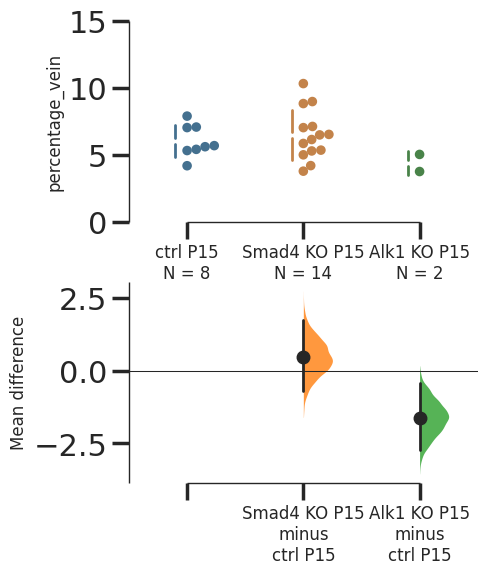

In [39]:
properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_vein",
                          idx=(( 'ctrl P15',  'Smad4 KO P15',  'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test.savefig(out_folder + "percentage_vein_P15.pdf")
test.savefig(out_folder + "percentage_vein_P15.png")

/tmp/ipykernel_65973/3092021039.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3092021039.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3092021039.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3092021039.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = plot_df.append(temp_df, ignore_index = True)
/tmp/ipykernel_65973/3092021039.py:25: FutureWarning: The frame.append method is dep

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:28:25 2024.

The unpaired mean difference between ctrl P8 and ctrl P15 is -6.87 [95%CI -12.7, -2.0].
The p-value of the two-sided permutation t-test is 0.0346, calculated for legacy purposes only. 

The unpaired mean difference between Smad4 KO P8 and Smad4 KO P15 is -15.0 [95%CI -23.2, -10.4].
The p-value of the two-sided permutation t-test is 0.0, calculated for legacy purposes only. 

The unpaired mean difference between Alk1 KO P8 and Alk1 KO P15 is 0.754 [95%CI -4.03, 5.14].
The p-value of the two-sided permutation t-test is 0.82, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P8,ctrl P15,8,8,mean difference,None,-6.865293,95,-12.658332,-2.003435,...,"[0.8366418643542204, -2.7646526305813204, 3.22...",0.0346,5000,"[11.603505970694739, 11.107553502224018, 10.91...",0.032800,2.384859,0.031777,2.384859,0.049883,51.0
1,Smad4 KO P8,Smad4 KO P15,7,14,mean difference,None,-15.007134,95,-23.222322,-10.379755,...,"[-1.9512386217697824, 6.38242475090572, 0.3805...",0.0000,5000,"[30.59266180235099, 12.173593878139608, 26.616...",0.001875,4.564888,0.000026,5.504642,0.000034,97.0
2,Alk1 KO P8,Alk1 KO P15,5,2,mean difference,None,0.753923,95,-4.029196,5.136080,...,"[0.75392342783109, -1.1614066986931313, 1.8133...",0.8204,5000,"[8.74072051800778, 16.07086475587415, 5.908299...",0.818810,-0.255008,0.828922,-0.227666,0.857143,4.0


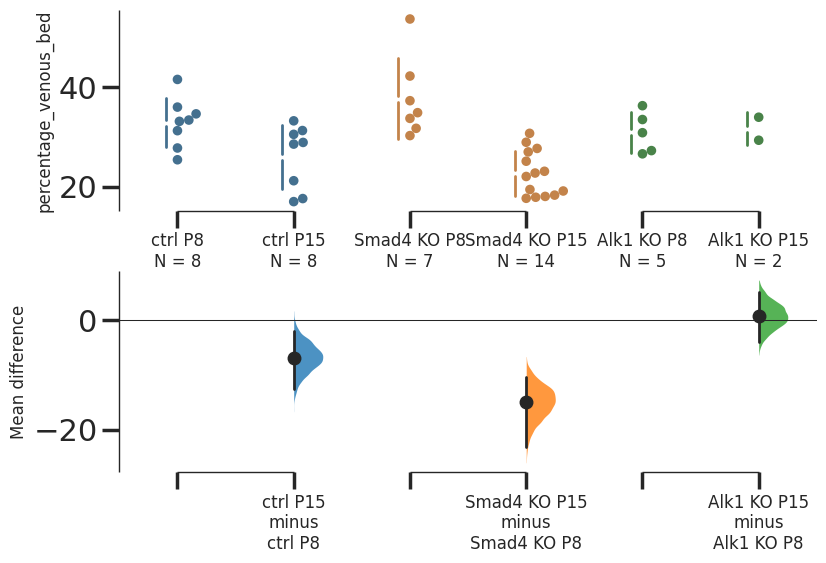

In [40]:
control_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='control']['percentage_venous_bed'])
control_p15 = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='control']['percentage_venous_bed'])
SMAD4_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='SMAD4-KO']['percentage_venous_bed'])
SMAD4_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='SMAD4-KO']['percentage_venous_bed'])
Alk1_p8 = np.array(summary_data_P5_P8[summary_data_P5_P8['condition']=='ALK1-KO']['percentage_venous_bed'])
Alk1_p15  = np.array(summary_data_P5_P15[summary_data_P5_P15['condition']=='ALK1-KO']['percentage_venous_bed'])


plot_df = pd.DataFrame(data = {'percentage_venous_bed':control_p8})
plot_df['condition'] = 'ctrl P8'
temp_df = pd.DataFrame(data = {'percentage_venous_bed':control_p15})
temp_df['condition'] = 'ctrl P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_venous_bed':SMAD4_p8})
temp_df['condition'] = 'Smad4 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_venous_bed':SMAD4_p15})
temp_df['condition'] = 'Smad4 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_venous_bed':Alk1_p8})
temp_df['condition'] = 'Alk1 KO P8'
plot_df = plot_df.append(temp_df, ignore_index = True)
temp_df = pd.DataFrame(data = {'percentage_venous_bed':Alk1_p15})
temp_df['condition'] = 'Alk1 KO P15'
plot_df = plot_df.append(temp_df, ignore_index = True)

properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_venous_bed",
                          idx=(( 'ctrl P8',  'ctrl P15'), 
                               ( 'Smad4 KO P8',   'Smad4 KO P15'), 
                               ( 'Alk1 KO P8',   'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test = properties_dabest.mean_diff.plot(custom_palette = time_condition_palette) 
test.savefig(out_folder + "percentage_venous_bed_P8_P15.pdf")
test.savefig(out_folder + "percentage_venous_bed_P8_P15.png")

DABEST v2024.03.29
                  
Good morning!
The current time is Wed Jul 24 01:28:34 2024.

The unpaired mean difference between ctrl P15 and Smad4 KO P15 is -3.34 [95%CI -7.7, 1.81].
The p-value of the two-sided permutation t-test is 0.169, calculated for legacy purposes only. 

The unpaired mean difference between ctrl P15 and Alk1 KO P15 is 5.62 [95%CI 0.62, 11.4].
The p-value of the two-sided permutation t-test is 0.184, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,ctrl P15,Smad4 KO P15,8,14,mean difference,None,-3.340989,95,-7.696221,1.808025,...,"[-2.6738054787246277, 0.42584559855361803, -3....",0.1694,5000,"[5.6966284570900285, 5.635469950351976, 5.4405...",0.221801,1.294879,0.168740,1.427937,0.330087,71.0
1,ctrl P15,Alk1 KO P15,8,2,mean difference,None,5.618660,95,0.619645,11.359035,...,"[-4.888725558195912, -3.7776071545000534, -5.2...",0.1840,5000,"[36.368865878058145, 55.18727494725265, 39.690...",0.170830,-1.729639,0.280372,-1.157721,0.266667,3.0


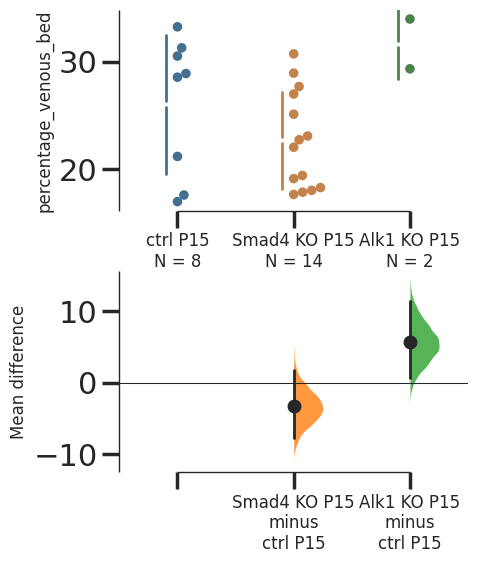

In [41]:
properties_dabest = dabest.load(data = plot_df, x="condition", y="percentage_venous_bed",
                          idx=(( 'ctrl P15',  'Smad4 KO P15',  'Alk1 KO P15')))

print(properties_dabest.mean_diff)
display(properties_dabest.mean_diff.results)

#properties_dabest = dabest.load(data = summary_data_CTR, x="time_interval", y="labelled_arterial_ECs",
#                          idx=('P8_P9', 'P5_P6', 'P5_P7', 'P5_P8', 'P5_P9'))

# Produce a Cumming estimation plot.
#test = properties_dabest.mean_diff.plot(swarm_ylim=(0, 10), contrast_ylim=(-3, 2));
#test = properties_dabest.mean_diff.plot(swarm_ylim=swarm_ylim, custom_palette = time_condition_palette) #, contrast_ylim=(-4, 2));
test = properties_dabest.mean_diff.plot( custom_palette = time_condition_palette)
test.savefig(out_folder + "percentage_venous_bed_P15.pdf")
test.savefig(out_folder + "percentage_venous_bed_P15.png")